In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
import requests
import json
from pprint import pprint
from confy import gkey

In [3]:
#base_url="http://api.eia.gov/geoset/?geoset_id=sssssss&regions=NewMexico&api_key=gkey[&start=|&num=1960][&end=2016][&out=json]"

In [4]:
# Gathering Production data by source of enery (Btu)
#base_url="http://api.eia.gov/series/?"
#api_key=YOUR_API_KEY_HERE&series_id=SEDS.CLPRB.NM.A

#series_id_to_call=["SEDS.CLPRB.NM.A;SEDS.PAPRB.NM.A;SEDS.NGMPB.NM.A;SEDS.REPRB.NM.A"]
#parame={"api_key":gkey,"series_id":series_id_to_call}

In [5]:
base_url="http://api.eia.gov/series/?"
series_id_to_call=["SEDS.CLPRB.NM.A"]
parame={"api_key":gkey,"series_id":series_id_to_call}
coal = requests.get(base_url, params=parame).json()
coal_df=pd.DataFrame(coal["series"][0]["data"])
#coal_df.rename({columns={"0": Year,"1":Energy}, inplace=True)
coal_df.columns=["Year","Coal_Energy_Production(Billion-Btu)"]
coal_df.head()

,Year,Coal_Energy_Production(Billion-Btu)
0,2016,246549
1,2015,357525
2,2014,400158
3,2013,400228
4,2012,409050


In [15]:
base_url="http://api.eia.gov/series/?"
series_id_to_call=["SEDS.PAPRB.NM.A"]
parame={"api_key":gkey,"series_id":series_id_to_call}
Crude = requests.get(base_url, params=parame).json()
Crude_df=pd.DataFrame(Crude["series"][0]["data"])
Crude_df.columns=["Year","Crude_Oil_Energy_Production(Billion-Btu)"]
Crude_df.head()

,Year,Crude_Oil_Energy_Production(Billion-Btu)
0,2016,835561
1,2015,842640
2,2014,723347
3,2013,595289
4,2012,496178


In [16]:
base_url="http://api.eia.gov/series/?"
series_id_to_call=["SEDS.NGMPB.NM.A"]
parame={"api_key":gkey,"series_id":series_id_to_call}
Gas = requests.get(base_url, params=parame).json()
Gas_df=pd.DataFrame(Gas["series"][0]["data"])
Gas_df.columns=["Year","Natura_Gas_Energy_Production(Billion-Btu)"]
Gas_df.head()

,Year,Natura_Gas_Energy_Production(Billion-Btu)
0,2016,1450059
1,2015,1442958
2,2014,1404289
3,2013,1338657
4,2012,1374261


In [17]:
base_url="http://api.eia.gov/series/?"
series_id_to_call=["SEDS.REPRB.NM.A"]
parame={"api_key":gkey,"series_id":series_id_to_call}
Renew = requests.get(base_url, params=parame).json()
Renew_df=pd.DataFrame(Renew["series"][0]["data"])
Renew_df.columns=["Year","Renewable_Energy_Production(Billion-Btu)"]
Renew_df.head()

,Year,Renewable_Energy_Production(Billion-Btu)
0,2016,50045
1,2015,35709
2,2014,41959
3,2013,39772
4,2012,37798


In [18]:
all_data=[coal_df,Crude_df,Gas_df,Renew_df]
Production_table=reduce (lambda left,right: pd.merge(left,right,on='Year'), all_data)
Production_table.head()

,Year,Coal_Energy_Production(Billion-Btu),Crude_Oil_Energy_Production(Billion-Btu),Natura_Gas_Energy_Production(Billion-Btu),Renewable_Energy_Production(Billion-Btu)
0,2016,246549,835561,1450059,50045
1,2015,357525,842640,1442958,35709
2,2014,400158,723347,1404289,41959
3,2013,400228,595289,1338657,39772
4,2012,409050,496178,1374261,37798


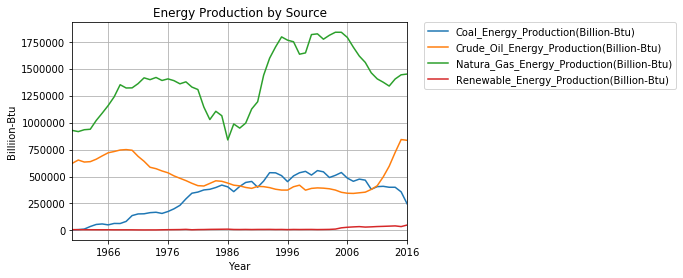

In [40]:
Production_table.plot("Year",)
plt.gca().invert_xaxis() #invert axes
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Billiion-Btu')
plt.title('Energy Production by Source')
plt.grid(True)
plt.show()

In [22]:
base_url="http://api.eia.gov/series/?"
series_id_to_call=["SEDS.TETCB.NM.A"]
parame={"api_key":gkey,"series_id":series_id_to_call}
Total = requests.get(base_url, params=parame).json()
Total_df=pd.DataFrame(Total["series"][0]["data"])
#coal_df.rename({columns={"0": Year,"1":Energy}, inplace=True)
Total_df.columns=["Year","Tota_Energy_Consumption(Billion-Btu)"]
Total_df.head()

,Year,Tota_Energy_Consumption(Billion-Btu)
0,2016,667125
1,2015,676563
2,2014,680239
3,2013,670515
4,2012,666801


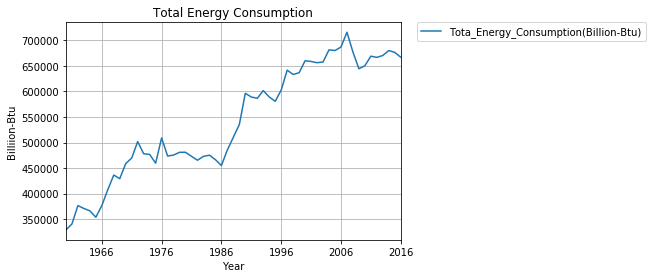

In [23]:
Total_df.plot("Year",)
plt.gca().invert_xaxis() #invert axes
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Billiion-Btu')
plt.title('Total Energy Consumption')
plt.grid(True)
plt.show()

In [24]:
#Consumptionn by sector:
#coal...........................................................................
base_url="http://api.eia.gov/series/?"
series_id_to_call=["SEDS.CLTCB.NM.A"]
parame={"api_key":gkey,"series_id":series_id_to_call}
coal_consump = requests.get(base_url, params=parame).json()
coal_consump_df=pd.DataFrame(coal_consump["series"][0]["data"])
#coal_df.rename({columns={"0": Year,"1":Energy}, inplace=True)
coal_consump_df.columns=["Year","Coal_Consumption(Billion-Btu)"]
#coal_consump_df.head()
#Oil..........................................................................
base_url="http://api.eia.gov/series/?"
series_id_to_call=["SEDS.PMTCB.NM.A"]
parame={"api_key":gkey,"series_id":series_id_to_call}
oil_consump = requests.get(base_url, params=parame).json()
oil_consump_df=pd.DataFrame(oil_consump["series"][0]["data"])
#coal_df.rename({columns={"0": Year,"1":Energy}, inplace=True)
oil_consump_df.columns=["Year","Crude_oil_Consumption(Billion-Btu)"]
#oil_consump_df.head()

#Natural Gas...................................................................
base_url="http://api.eia.gov/series/?"
series_id_to_call=["SEDS.NGTCB.NM.A"]
parame={"api_key":gkey,"series_id":series_id_to_call}
gas_consump = requests.get(base_url, params=parame).json()
gas_consump_df=pd.DataFrame(gas_consump["series"][0]["data"])
#coal_df.rename({columns={"0": Year,"1":Energy}, inplace=True)
gas_consump_df.columns=["Year","Natural_Gas_Consumption(Billion-Btu)"]
#gas_consump_df.head()


In [25]:
#Renewable_Energy..................................................................
base_url="http://api.eia.gov/series/?"
series_id_to_call=["SEDS.RETCB.NM.A"]
parame={"api_key":gkey,"series_id":series_id_to_call}
renew_consump = requests.get(base_url, params=parame).json()
renew_consump_df=pd.DataFrame(renew_consump["series"][0]["data"])
renew_consump_df.columns=["Year","Renewable_Energys_Consumption(Billion-Btu)"]
#renew_consump_df.head()

In [26]:
all_Comsupmtion_data=[coal_consump_df,oil_consump_df,gas_consump_df,renew_consump_df]
Consumption_table=reduce(lambda left,right: pd.merge(left,right,on='Year'), all_Comsupmtion_data)
Consumption_table.head()

,Year,Coal_Consumption(Billion-Btu),Crude_oil_Consumption(Billion-Btu),Natural_Gas_Consumption(Billion-Btu),Renewable_Energys_Consumption(Billion-Btu)
0,2016,197083,237867,259158,58296
1,2015,215703,239184,260038,44125
2,2014,215348,241242,256056,46598
3,2013,256377,232753,252867,44906
4,2012,263439,232630,249815,43728


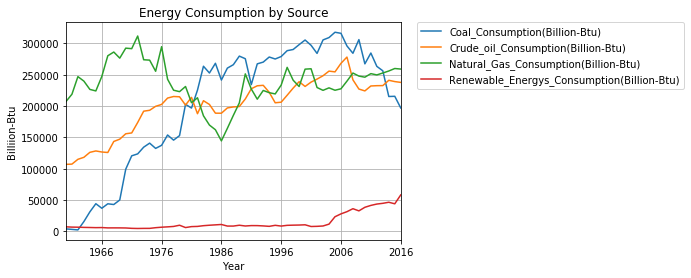

In [27]:
Consumption_table.plot("Year",)
plt.gca().invert_xaxis() #invert axes
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Billiion-Btu')
plt.title('Energy Consumption by Source')
plt.grid(True)
plt.show()

In [28]:
#Total Consumption per capita..................................................................
base_url="http://api.eia.gov/series/?"
series_id_to_call=["SEDS.TETPB.NM.A"]
parame={"api_key":gkey,"series_id":series_id_to_call}
Total_perCapita_consump = requests.get(base_url, params=parame).json()
Total_perCapita_consump_df=pd.DataFrame(Total_perCapita_consump["series"][0]["data"])
Total_perCapita_consump_df.columns=["Year","Total(per Capita)_Consumption(Billion-Btu)"]
Total_perCapita_consump_df.head()

,Year,Total(per Capita)_Consumption(Billion-Btu)
0,2016,319.9
1,2015,324.9
2,2014,326.5
3,2013,321.6
4,2012,320.0


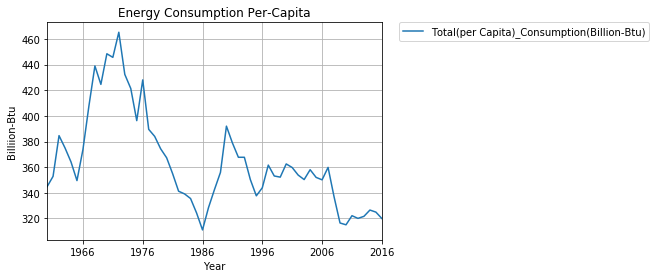

In [29]:
Total_perCapita_consump_df.plot("Year",)
plt.gca().invert_xaxis() #invert axes
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Billiion-Btu')
plt.title('Energy Consumption Per-Capita')
plt.grid(True)
plt.show()

In [30]:
#drilling down to Electricity  Renewables Net Generation Electric power (total)...............................................................
base_url="http://api.eia.gov/series/?"
series_id_to_call=["ELEC.GEN.AOR-NM-98.A"]
parame={"api_key":gkey,"series_id":series_id_to_call}
Renewables_Net_Generation = requests.get(base_url, params=parame).json()
Renewables_Net_Generation_df=pd.DataFrame(Renewables_Net_Generation["series"][0]["data"])
Renewables_Net_Generation_df.columns=["Year","Renewables Net Generation(Thousand Megawatthours)"]
Unit_Cal=Renewables_Net_Generation_df["Renewables Net Generation(Thousand Megawatthours)"]*(3.412)
Renewables_Net_Generation_df["Renewables Net Generation(Billion-Btu)"]=Unit_Cal
Renewables_Net_Generation_df=Renewables_Net_Generation_df.drop("Renewables Net Generation(Thousand Megawatthours)",axis=1)
Renewables_Net_Generation_df.head()


,Year,Renewables Net Generation(Billion-Btu)
0,2018,25556.523333
1,2017,19840.785630
2,2016,14966.793923
3,2015,9319.227639
4,2014,9586.398328


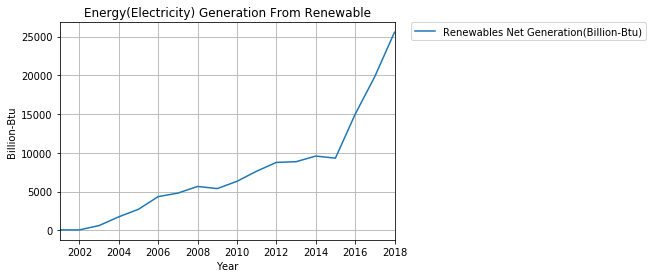

In [31]:
Renewables_Net_Generation_df.plot("Year",)
plt.gca().invert_xaxis() #invert axes
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Billion-Btu')
plt.title('Energy(Electricity) Generation From Renewable')
plt.grid(True)
plt.show()

In [32]:
#Solar Net_Generation
base_url="http://api.eia.gov/series/?"
series_id_to_call=["ELEC.GEN.SUN-NM-98.A"]
parame={"api_key":gkey,"series_id":series_id_to_call}
Solar_Net_Generation = requests.get(base_url, params=parame).json()
Solar_Net_Generation_df=pd.DataFrame(Solar_Net_Generation["series"][0]["data"])
Solar_Net_Generation_df.columns=["Year","Solar Net Generation(Thousand Megawatthours)"]
Solar_Net_Generation_df.columns=["Year","Solar Net Generation(Thousand Megawatthours)"]
Unit_Cal=Solar_Net_Generation_df["Solar Net Generation(Thousand Megawatthours)"]*(3.412)
Solar_Net_Generation_df["Solar Net Generation(Billion-Btu)"]=Unit_Cal
Solar_Net_Generation_df=Solar_Net_Generation_df.drop("Solar Net Generation(Thousand Megawatthours)",axis=1)
Solar_Net_Generation_df.head()

,Year,Solar Net Generation(Billion-Btu)
0,2018,4406.416140
1,2017,4069.289727
2,2016,2565.264432
3,2015,2097.960324
4,2014,1757.364965


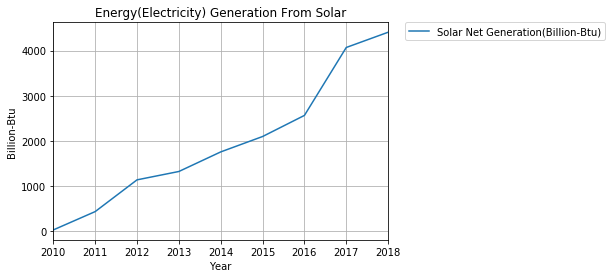

In [33]:
Solar_Net_Generation_df.plot("Year",)
plt.gca().invert_xaxis() #invert axes
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Billion-Btu')
plt.title('Energy(Electricity) Generation From Solar')
plt.grid(True)
plt.show()

In [34]:
# Coal Consumption to generate Electicity

base_url="http://api.eia.gov/series/?"
series_id_to_call=["ELEC.CONS_TOT_BTU.COW-NM-98.A"]
parame={"api_key":gkey,"series_id":series_id_to_call}
Coal_Electicity_Consu = requests.get(base_url, params=parame).json()
Coal_Electicity_Consu_df=pd.DataFrame(Coal_Electicity_Consu ["series"][0]["data"])
Coal_Electicity_Consu_df.columns=["Year","Coal Electicity Consumption(Billion-Btu?)"]
New_Col=Coal_Electicity_Consu_df["Coal Electicity Consumption(Billion-Btu?)"]*1000
#Coal_Electicity_Consu_df.head() # We have to change the unit 
Coal_Electicity_Consu_df["Coal Electicity Consumption(Billion-Btu)"]=New_Col
Coal_Electicity_Consu_df = Coal_Electicity_Consu_df.drop("Coal Electicity Consumption(Billion-Btu?)",axis=1)
Coal_Electicity_Consu_df.head()

,Year,Coal Electicity Consumption(Billion-Btu)
0,2018,135031.06
1,2017,197336.77
2,2016,195274.57
3,2015,214012.66
4,2014,213897.67


In [35]:
# Petroleum liquids Consumption to generate Electicity

base_url="http://api.eia.gov/series/?"
series_id_to_call=["ELEC.CONS_TOT_BTU.PEL-NM-98.A"]
parame={"api_key":gkey,"series_id":series_id_to_call}
Petroleum_Electicity_Consu = requests.get(base_url, params=parame).json()
Petroleum_Electicity_Consu_df=pd.DataFrame(Petroleum_Electicity_Consu["series"][0]["data"])
Petroleum_Electicity_Consu_df.columns=["Year","Petroleum liquids Electicity Consumption(Billion-Btu?)"]
Unit_Cal=Petroleum_Electicity_Consu_df["Petroleum liquids Electicity Consumption(Billion-Btu?)"]*1000 
Petroleum_Electicity_Consu_df["Petroleum liquids Electicity Consumption(Billion-Btu)"]=Unit_Cal
Petroleum_Electicity_Consu_df=Petroleum_Electicity_Consu_df.drop("Petroleum liquids Electicity Consumption(Billion-Btu?)",axis=1)
Petroleum_Electicity_Consu_df.head() # We have to change the unit 

,Year,Petroleum liquids Electicity Consumption(Billion-Btu)
0,2018,234.19
1,2017,455.74
2,2016,569.31
3,2015,713.56
4,2014,698.28


In [37]:
# Natural Gas Consumption to generate Electicity

base_url="http://api.eia.gov/series/?"
series_id_to_call=["ELEC.CONS_TOT_BTU.NG-NM-98.A"]
parame={"api_key":gkey,"series_id":series_id_to_call}
Natural_Gas_Consu = requests.get(base_url, params=parame).json()
Natural_Gas_Consu_df=pd.DataFrame(Natural_Gas_Consu["series"][0]["data"])
Natural_Gas_Consu_df.columns=["Year","Natural_Gas_Electicity Consumption(Billion-Btu?)"]
Unit_Cal=Natural_Gas_Consu_df["Natural_Gas_Electicity Consumption(Billion-Btu?)"]*1000 
Natural_Gas_Consu_df["Natural Gas Electicity Consumption(Billion-Btu)"]=Unit_Cal
Natural_Gas_Consu_df=Natural_Gas_Consu_df.drop("Natural_Gas_Electicity Consumption(Billion-Btu?)",axis=1)
Natural_Gas_Consu_df.head() # We have to change the unit 


,Year,Natural Gas Electicity Consumption(Billion-Btu)
0,2018,100146.56
1,2017,78800.44
2,2016,85374.03
3,2015,81243.94
4,2014,79539.85


In [38]:
all_Comsupmtion_Electricity_data=[Coal_Electicity_Consu_df,Petroleum_Electicity_Consu_df,Natural_Gas_Consu_df]
Electricity_Consumption_table=reduce(lambda left,right: pd.merge(left,right,on='Year'), all_Comsupmtion_Electricity_data)
Electricity_Consumption_table.head()

,Year,Coal Electicity Consumption(Billion-Btu),Petroleum liquids Electicity Consumption(Billion-Btu),Natural Gas Electicity Consumption(Billion-Btu)
0,2018,135031.06,234.19,100146.56
1,2017,197336.77,455.74,78800.44
2,2016,195274.57,569.31,85374.03
3,2015,214012.66,713.56,81243.94
4,2014,213897.67,698.28,79539.85


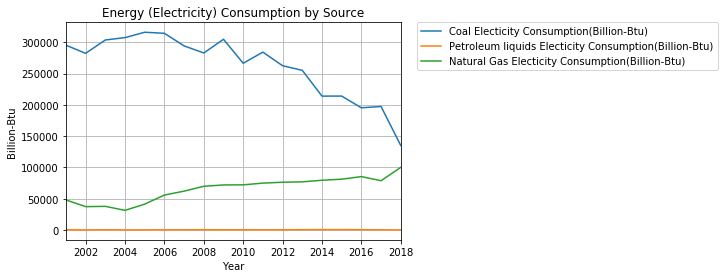

In [39]:
Electricity_Consumption_table.plot("Year",)
plt.gca().invert_xaxis() #invert axes
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Billion-Btu')
plt.title('Energy (Electricity) Consumption by Source')
plt.grid(True)
plt.show()